<a href="https://colab.research.google.com/github/Aruniaaa/NoteBooks-Dump/blob/main/pytorch_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals


In [ ]:
# Making the necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
print(torch.__version__)

2.8.0+cu126


## Tensors

In [ ]:
scalar = torch.tensor(35)
print(scalar.ndim) # number of dimensions in the tensor
print(scalar.shape) # shape of the tensor (e.g. -> 3x2, 5x2, 5x6, 9x100, etc.)
print(scalar.item()) # integer value inside that tensor

0
torch.Size([])
35


### Tensor Multiplication

The ith element of tensor_1 gets multiplied by the ith element of tensor_2

In [ ]:
tensor_1 = torch.tensor([
    [
      [2, 3, 4],
      [5, 6, 7]
    ],
    [
        [8, 9, 10],
        [11, 12, 13]
    ]
])

tensor_2 = torch.tensor([
    [
      [2, 2, 2],
      [2, 2, 2]
    ],
    [
        [2, 2, 12],
        [12, 22, 12]
    ]
])

tensor_1 * tensor_2

tensor([[[  4,   6,   8],
         [ 10,  12,  14]],

        [[ 16,  18, 120],
         [132, 264, 156]]])

In [ ]:
range_tensor = torch.arange(1, 11) # returns a tensor with numbers 0-10


In [ ]:
tensor = torch.tensor([4, 5, 6], dtype=torch.int)
torch.matmul(tensor, tensor) # outputs tensor(77, dtype=torch.int32)

tensor(77, dtype=torch.int32)

In [ ]:
tensor_2d = torch.tensor([[2, 3, 4], [69, 67, 12]], dtype=torch.float)
tensor_3d = torch.tensor([[23, 45], [45, 67], [67, 67]], dtype=torch.float)
torch.matmul(tensor_2d, tensor_3d)

tensor([[ 449.,  559.],
        [5406., 8398.]])

In [ ]:
print(tensor_2d.mean())
print(tensor_2d.sum())
print(tensor_2d.max())
print(tensor_2d.min())

tensor(26.1667)
tensor(157.)
tensor(69.)
tensor(2.)


In [ ]:
random_1 = torch.rand(3, 4)
random_2 = torch.rand(4, 3)
random_2 = torch.transpose(random_2, 0, 1)

torch.stack([random_1, random_2], axis=1)

tensor([[[0.0848, 0.4847, 0.1010, 0.8927],
         [0.0372, 0.8000, 0.7879, 0.4603]],

        [[0.4273, 0.4653, 0.5831, 0.4094],
         [0.4953, 0.8064, 0.4011, 0.0959]],

        [[0.3828, 0.6981, 0.5580, 0.6777],
         [0.3713, 0.7455, 0.3968, 0.5394]]])

In [ ]:
import torch
import numpy as np

arr = np.arange(1, 10)
tensor = torch.arange(1, 10)
numpy_arr = tensor.numpy()
tensor_from_numpy = torch.from_numpy(arr)
numpy_arr, tensor_from_numpy

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [ ]:
torch.manual_seed(42)
random_ahh = torch.rand(6, 7)
torch.manual_seed(42)
random_ahh_2 = torch.rand(6, 7)

print(random_ahh == random_ahh_2)

tensor([[True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True]])


## Pytorch Workflow!!

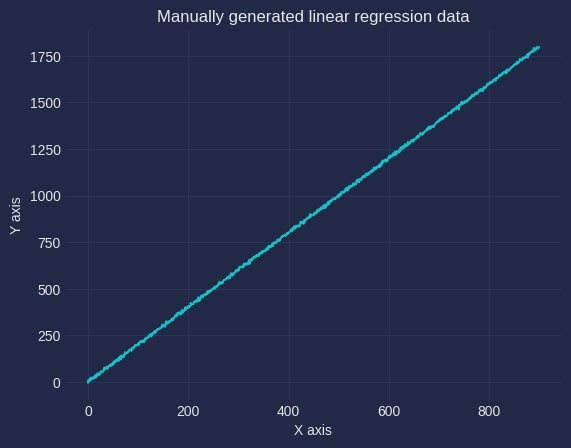

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


X_numpy = np.array([[i] for i in range(1000)], dtype=np.float32)
Y_numpy = np.array([[2 * i + 1 + np.random.randn() * 5] for i in range(1000)], dtype=np.float32)

X = torch.from_numpy(X_numpy)
Y = torch.from_numpy(Y_numpy)

training_size = 0.9
X_train = X[: int((len(X) * training_size))]
Y_train = Y[: int((len(Y) * training_size))]

X_test = X[int((len(X) * training_size)) : ]
Y_test = Y[int((len(Y) * training_size)) : ]



plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
plt.plot(X_train, Y_train)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Manually generated linear regression data")
plt.show()

In [ ]:
X_mean, X_std = X_train.mean(), X_train.std()
Y_mean, Y_std = Y_train.mean(), Y_train.std()

X_train_scaled = (X_train - X_mean) / X_std
Y_train_scaled = (Y_train - Y_mean) / Y_std

X_test_scaled = (X_test - X_mean) / X_std
Y_test_scaled = (Y_test - Y_mean) / Y_std

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.weights * x + self.bias

torch.manual_seed(42)
model = LinearRegression()
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01, momentum=0.9)


In [ ]:
epochs = 1000


for epoch in range(epochs):
  model.train()

  Y_pred  = model(X_train_scaled)

  loss = loss_fn(Y_pred, Y_train_scaled)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # model.eval()
  # with torch.inference_mode():
  #   test_pred = model(X_test_scaled)
  #   loss_test = loss_fn(test_pred, Y_test_scaled)

  # if epoch % 10 == 0:
  #  print(f"Train loss: {loss} | Test Loss: {loss_test}")




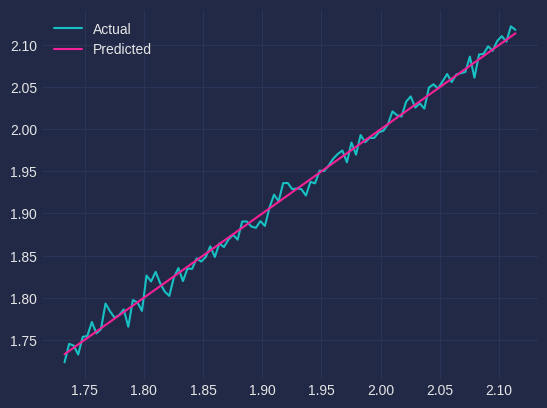

In [ ]:
with torch.inference_mode():
    Y_pred = model(X_test_scaled)

plt.plot(X_test_scaled, Y_test_scaled, label="Actual")
plt.plot(X_test_scaled, Y_pred, label="Predicted")
plt.legend()
plt.show()